In [0]:
%restart_python

In [0]:
%pip install kaggle

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
download_path ="/Volumes/workspace/default/netflix/kaggle"
dbutils.fs.mkdirs(download_path)

True

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "ankitahub"
os.environ['KAGGLE_KEY'] ="10ab0b2b8f256946825ceb12f5c30199"

In [0]:
!kaggle datasets download -d shivamb/netflix-shows -p {download_path} --unzip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0%|                                               | 0.00/1.34M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.34M/1.34M [00:00<00:00, 8.73MB/s]


In [0]:
import pandas as pd
df = pd.read_csv(download_path+"/netflix_newcleaned.csv")

In [0]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 show_id          0
content_type     0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
genres           0
description      0
duration_int     3
duration_type    0
dtype: int64


In [0]:
df.duplicated().sum()


0

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Index(['show_id', 'content_type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'genres',
       'description', 'duration_int', 'duration_type'],
      dtype='object')


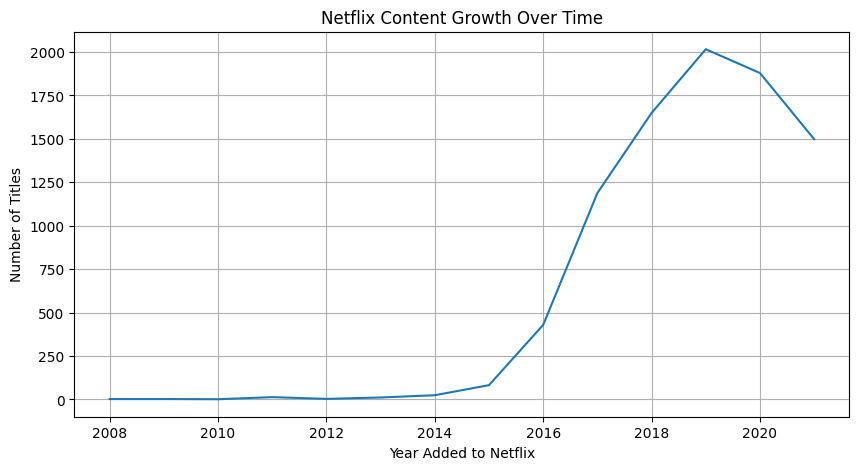

In [0]:
# Check column names to find release or date-added column
print(df.columns)

# Convert 'release_year' or 'date_added' to datetime (if exists)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Count number of titles per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot content growth
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


/home/spark-489f3dfb-2744-4f7d-b186-12/.ipykernel/4218/command-4733576494167031-3772558685:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='content_type', data=df, palette='pastel')


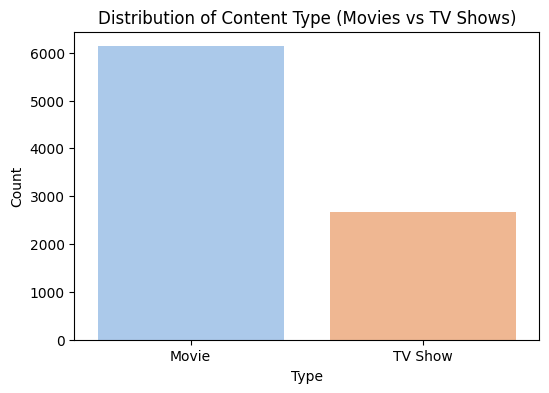

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(x='content_type', data=df, palette='pastel')
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


/home/spark-489f3dfb-2744-4f7d-b186-12/.ipykernel/4218/command-4733576494167032-1976037810:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')


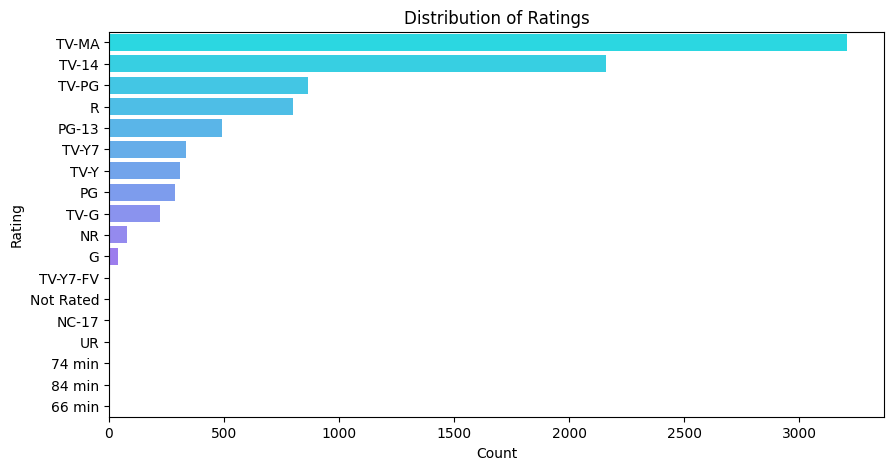

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


/home/spark-489f3dfb-2744-4f7d-b186-12/.ipykernel/4218/command-4733576494167033-3202730361:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='magma')


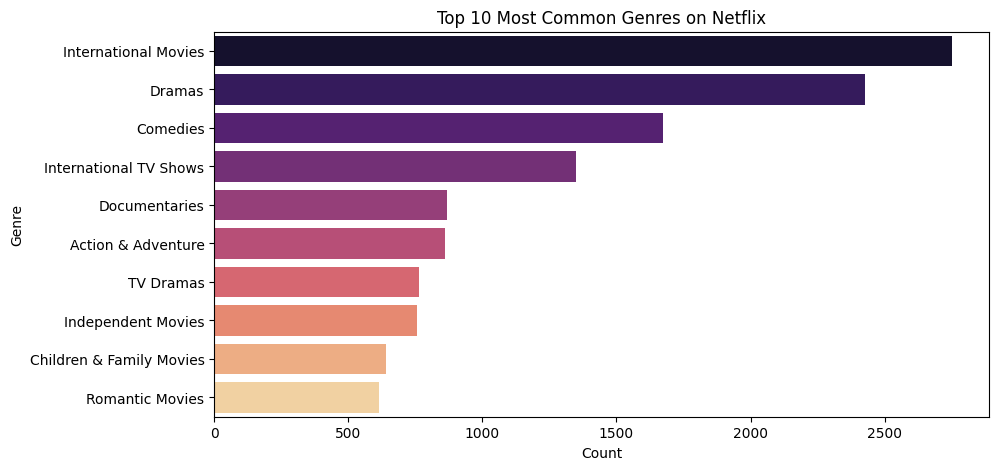

In [0]:
# Some rows may have multiple genres separated by commas
df['genres'] = df['genres'].astype(str)

# Split and count
from collections import Counter
genre_list = df['genres'].str.split(', ')
genres = [g for sublist in genre_list for g in sublist]
top_genres = pd.DataFrame(Counter(genres).most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()


/home/spark-489f3dfb-2744-4f7d-b186-12/.ipykernel/4218/command-4733576494167034-354332219:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')


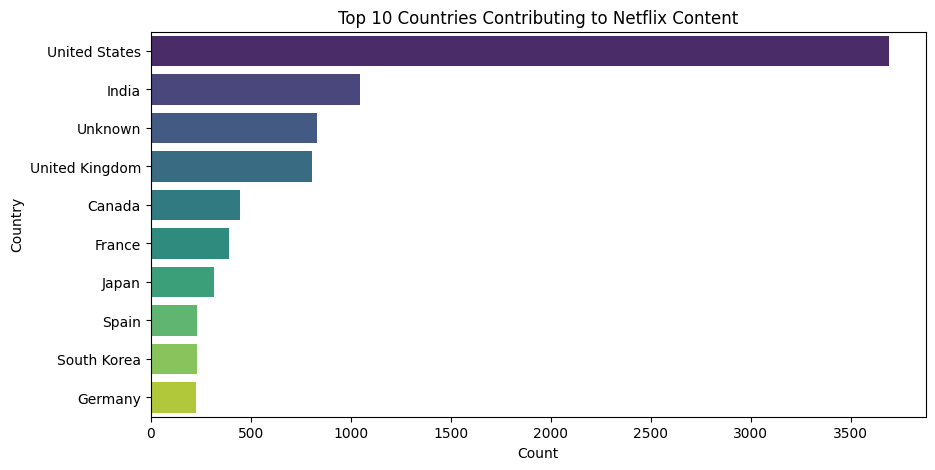

In [0]:
df['country'] = df['country'].astype(str)
country_list = df['country'].str.split(', ')
countries = [c for sublist in country_list for c in sublist]
top_countries = pd.DataFrame(Counter(countries).most_common(10), columns=['Country', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.show()


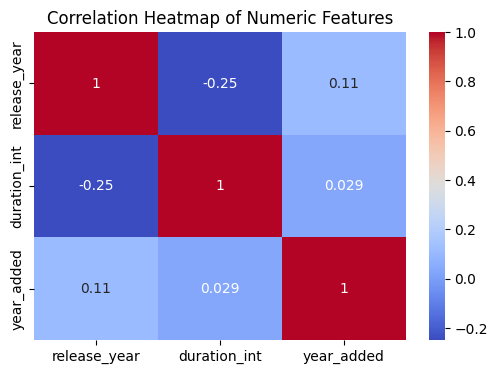

In [0]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Red / Dark Orange	Strong Positive Correlation	e.g. release_year ↑ → year_added ↑

🔵 Blue / Dark Purple	Strong Negative Correlation	e.g. duration_int ↓ → year_added ↑

⚪ White / Light Colors	Weak or No Correlation